 # **Import of modules & colors**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import json
import csv
import datetime as dt
import  math

import warnings

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import kruskal
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

from numpy import mean
from numpy import std

from typing import List

In [2]:
import seaborn as sns
sns.set(style="ticks")
sns.set_color_codes("colorblind")
sns.set(style="darkgrid")

In [2]:
import seaborn as sns
sns.set(style="ticks")
sns.set_color_codes("colorblind")
sns.set(style="darkgrid")

In [3]:
import warnings
warnings.filterwarnings('ignore')

Color spectrum

In [4]:
color = [
'#000000',
'#000080',
'#0B0BFF',
'#98B5FF', 
'#BBC9DB',
'#797975',
'#0198E1',
'#00688B',
'#74CDDC', #nej
'#05EDFF',  
'#C9FFFF', 
'#8FBCBC',
'#457371',
'#28AE7B',
'#4DFFA5'
]

# **Load of data, new columns, datatypes and period of time definiton**

In [5]:
soubor = pd.read_csv('final.csv', encoding='utf-8', low_memory=False)

In [6]:
soubor['DELAY'].describe()

count    8475.000000
mean       71.800708
std        98.345210
min      -186.000000
25%         9.000000
50%        48.000000
75%       109.000000
max       839.000000
Name: DELAY, dtype: float64

Datatypes

In [7]:
soubor['TIMETABLE_ARRIVAL_TIME'] = pd.to_datetime(soubor['TIMETABLE_ARRIVAL_TIME']).dt.time

In [8]:
soubor['ORIGIN_TIMESTAMP'] = pd.to_datetime(soubor['ORIGIN_TIMESTAMP']).dt.time

In [9]:
soubor['START_TIME'] = pd.to_datetime(soubor['START_TIME']).dt.time

New column with time (hours&minutes) when the bus sent the location/was at the bus stop

In [10]:
for i, x in enumerate(soubor['ORIGIN_TIMESTAMP']):
    hour = x.hour
    minute = (math.floor(x.minute/10))*(1/6)
    soubor.loc[i,'HOUR'] = hour
    soubor.loc[i,'MINUTES'] = minute
    soubor.loc[i,'TIME'] = hour+minute

In [11]:
soubor

,TRIP_ID,ROUTE,DAY_OF_WEEK,DATE,UNICORN,START_TIME,HEADSIGN,STOP_ID,STOP_SEQUENCE,STOP_NAME,SHAPE_DIST_TRAVELED,DELAY,ORIGIN_TIMESTAMP,TIMETABLE_ARRIVAL_TIME,DIFF_DELAY,PREV_DELAY,SEQUENCE,HOUR,MINUTES,TIME
0,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1502Z2,14,"Dolní Břežany,Náměstí",13.17849,98.0,07:16:42,07:15:00,0.0,NaN,1,7.0,0.166667,7.166667
1,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U1501Z2,15,"Dolní Břežany,Na kopečku",13.80006,32.0,07:17:32,07:17:00,-66.0,98.0,2,7.0,0.166667,7.166667
2,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U545Z2,16,Písnice,16.55734,45.0,07:21:40,07:21:00,13.0,32.0,3,7.0,0.333333,7.333333
3,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U546Z2,17,Ke Březině,16.93703,29.0,07:22:48,07:22:00,-16.0,45.0,4,7.0,0.333333,7.333333
4,331_241_200302,331,Wednesday,2020-05-06,331_241_200302_06_May,06:46:00,"Praha,Kačerov",U871Z2,18,Lipovická,17.13697,11.0,07:23:19,07:23:00,-18.0,29.0,5,7.0,0.333333,7.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,333_671_200307,333,Saturday,2020-05-30,333_671_200307_30_May,11:30:00,"Praha,Kačerov",U749Z2,11,Tempo,6.84113,153.0,11:47:43,11:45:00,-3.0,156.0,11,11.0,0.666667,11.666667
8471,333_671_200307,333,Saturday,2020-05-30,333_671_200307_30_May,11:30:00,"Praha,Kačerov",U656Z2,12,Sídliště Krč,7.17996,150.0,11:48:33,11:46:00,-3.0,153.0,12,11.0,0.666667,11.666667
8472,333_671_200307,333,Saturday,2020-05-30,333_671_200307_30_May,11:30:00,"Praha,Kačerov",U893Z4,13,Zálesí,7.64396,167.0,11:49:41,11:47:00,17.0,150.0,13,11.0,0.666667,11.666667
8473,333_671_200307,333,Saturday,2020-05-30,333_671_200307_30_May,11:30:00,"Praha,Kačerov",U488Z7,14,Nemocnice Krč,8.19682,140.0,11:51:21,11:49:00,-27.0,167.0,14,11.0,0.833333,11.833333


We want only rows where delay is higher than zero 

In [12]:
soubor = soubor[soubor['DELAY'] > 0]

Inside covid period / after covid period / week / weekend

In [13]:
inside_covid = soubor[(soubor['DATE'] <= '2020-05-17') & (~soubor['DAY_OF_WEEK'].isin(['Saturday','Sunday']))]

In [14]:
len(inside_covid['UNICORN'].unique())

176

In [15]:
after_covid_week = soubor[(soubor['DATE'] >= '2020-05-18') & (~soubor['DAY_OF_WEEK'].isin(['Saturday','Sunday']))]

In [16]:
len(after_covid_week['UNICORN'].unique())

238

In [17]:
after_covid_wknd = soubor[(soubor['DATE'] >= '2020-05-18') & (soubor['DAY_OF_WEEK'].isin(['Saturday','Sunday']))]

In [18]:
len(after_covid_wknd['UNICORN'].unique())

78

In [19]:
after_covid_full = soubor[soubor['DATE'] >= '2020-05-18']

In [20]:
len(after_covid_full['UNICORN'].unique())

316

# **Data from the 'time of a day' point of view (7-10:30 am during workweek)**

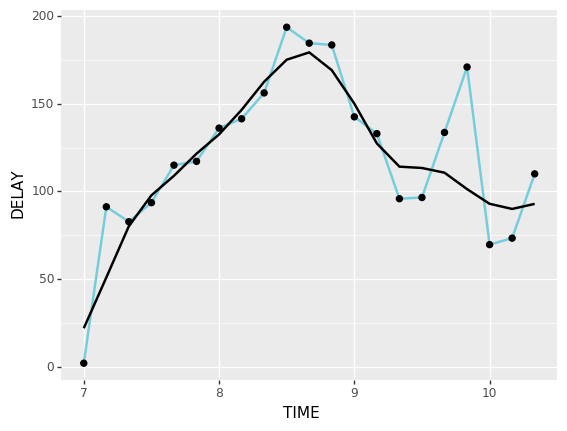

<ggplot: (-9223371922293948136)>

In [21]:
avg_delay_day = after_covid_week.groupby(['TIME'])[['DELAY']].mean()
avg_delay_day = avg_delay_day.reset_index()

plot_delay_day = ggplot(avg_delay_day, aes(x='TIME', y='DELAY')) + \
                    geom_line(color='#74CDDC',size=1) + \
                    geom_point(size=2) + \
                    scale_x_continuous(breaks=range(5, 13), minor_breaks=[]) + \
                    xlab("TIME") + \
                    ylab("DELAY") + \
                    stat_smooth(span = 0.3)
plot_delay_day

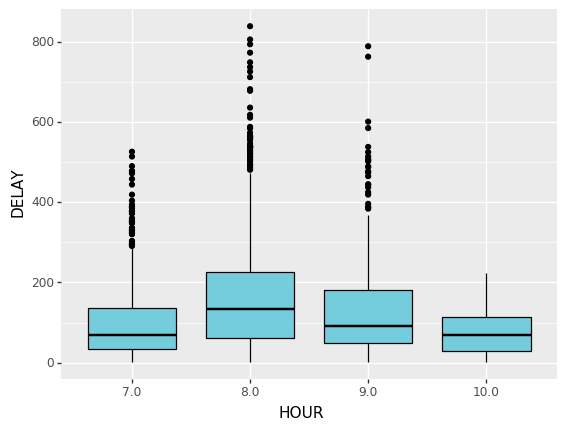

<ggplot: (-9223371922293951848)>

In [22]:
after_covid_week['HOUR_cat'] = after_covid_week['HOUR'].astype('category')

plotbox_delay_day = ggplot(after_covid_week, aes(x='HOUR_cat', y='DELAY')) + \
            geom_boxplot(color='black', fill='#74CDDC') + \
            xlab("HOUR") + \
            ylab("DELAY")
plotbox_delay_day

In [23]:
after_covid_week.groupby('TIME')['DELAY'].describe()

,count,mean,std,min,25%,50%,75%,max
TIME,,,,,,,,
7.000000,1.0,2.000000,NaN,2.0,2.00,2.0,2.00,2.0
7.166667,96.0,91.218750,48.949212,5.0,46.75,99.0,130.00,192.0
7.333333,259.0,82.714286,58.716863,1.0,31.00,73.0,126.00,240.0
7.500000,262.0,93.564885,89.788777,1.0,32.00,62.5,121.50,404.0
7.666667,165.0,114.969697,105.637174,2.0,39.00,81.0,159.00,526.0
7.833333,149.0,117.120805,123.400519,3.0,27.00,59.0,170.00,514.0
8.000000,147.0,136.115646,131.857983,5.0,49.50,103.0,152.00,539.0
8.166667,162.0,141.425926,119.729447,1.0,55.25,117.0,200.75,611.0
8.333333,165.0,156.181818,152.567349,1.0,37.00,98.0,240.00,726.0


### **Conclusion: peak of the highest delay is around 8 to 9 o'clock ->  new timeline**

In [24]:
t1 = dt.time(7,50,0)
t2 = dt.time(9,20,0)

In [25]:
peak_time = after_covid_week[ (after_covid_week['ORIGIN_TIMESTAMP']>=t1) & (after_covid_week['ORIGIN_TIMESTAMP']<=t2) ]

Statistical summary for new dataframe (workweek, 7:50 - 9:20 am) for Actual Delay column

In [26]:
peak_time['DELAY'].describe()

count    1587.000000
mean      156.548834
std       138.626943
min         1.000000
25%        54.000000
50%       118.000000
75%       214.000000
max       839.000000
Name: DELAY, dtype: float64

# **Normality test**

source: *https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/*

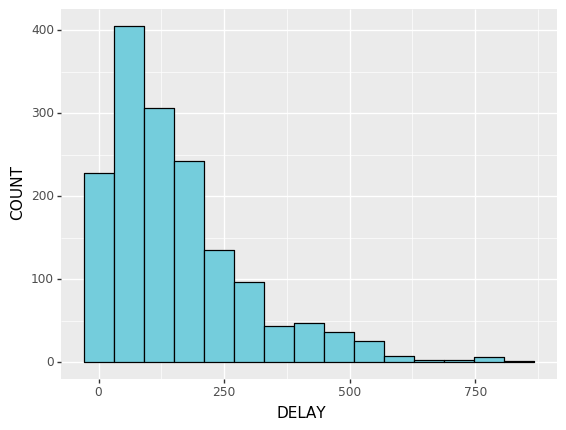

<ggplot: (-9223371922293376540)>

In [27]:
plot_hist1 = ggplot(peak_time, aes(x='DELAY')) + \
            geom_histogram(color='black', fill='#74CDDC', bins=15) + \
            xlab("DELAY") + \
            ylab("COUNT")

plot_hist1

In [28]:
stat, p = shapiro(peak_time['DIFF_DELAY'])
print(f'Statistics={stat}, p={round(p,5)}')

alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.8363928198814392, p=0.0
Sample does not look Gaussian (reject H0)


### Conclusion: there is no normal distribution (to be sure :))

# **Charts visualize relationship between delay/delay diff and a bus stop**

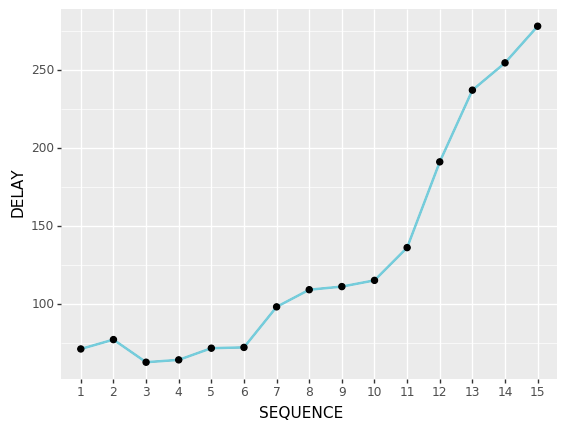

<ggplot: (-9223371922293352136)>

In [29]:
avg_delay_for_stop = peak_time.groupby(['SEQUENCE'])[['DELAY']].median()
avg_delay_for_stop = avg_delay_for_stop.reset_index()

plot_poin_delay_stop = ggplot(avg_delay_for_stop, aes(x='SEQUENCE', y='DELAY')) + \
    geom_point() + \
    geom_line() + \
    geom_line(color='#74CDDC',size=1) + \
    geom_point(size=2) + \
    scale_x_discrete(limits=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15)) + \
    xlab("SEQUENCE") + \
    ylab("DELAY")
plot_poin_delay_stop

Delay difference = increase/decrease of the delay from previous stop - we will be able to see between which stops the delay grew the most

#### Previous delay vs. delay difference

Points represent rows in the dataframe - every row is a moment when the bus was at the bus stop and the location with additional information was sent

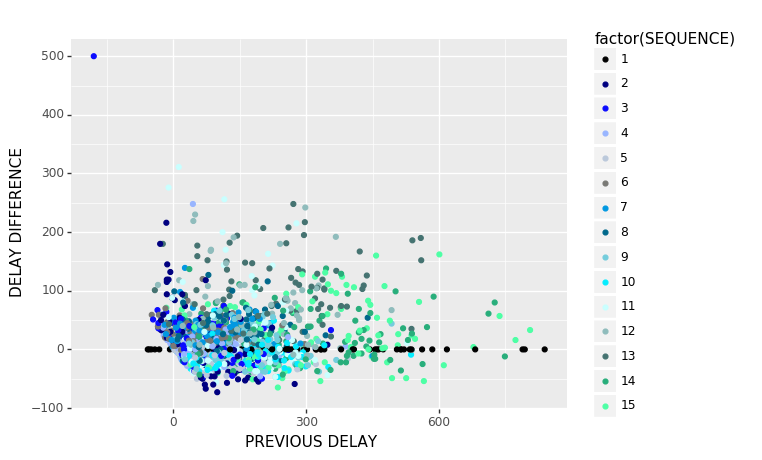

<ggplot: (-9223371922293325580)>

In [30]:
plot_point1 = ggplot(peak_time,(aes(x='PREV_DELAY', y='DIFF_DELAY',color = 'factor(SEQUENCE)'))) + \
        scale_color_manual(values=color) + \
        geom_point() + \
        xlab("PREVIOUS DELAY") + \
        ylab("DELAY DIFFERENCE")
plot_point1

#### Better! Previous delay vs. delay difference for each bus stop


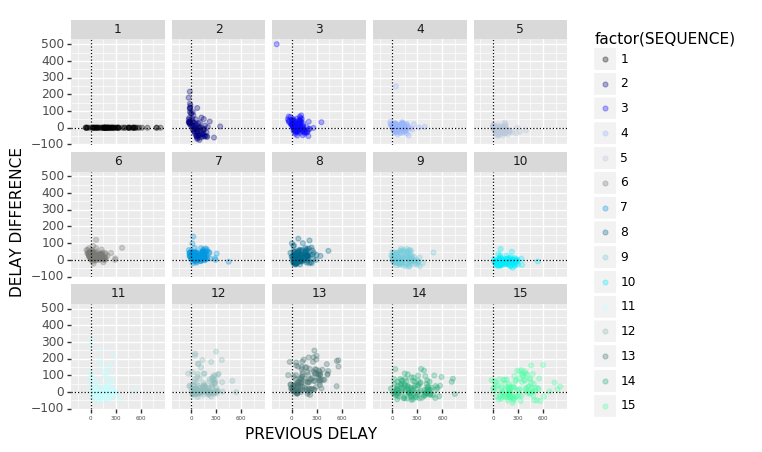

<ggplot: (-9223371922292177736)>

In [31]:
plot_point2 = ggplot(peak_time, aes(x='PREV_DELAY', y='DIFF_DELAY', color = 'factor(SEQUENCE)' )) + \
        geom_point(alpha=0.3) + \
        geom_hline(yintercept=0,linetype='dotted') + \
        geom_vline(xintercept=0,linetype='dotted') + \
        theme(axis_text_x = element_text(size=4)) + \
        facet_wrap(['SEQUENCE'], nrow=3) + \
        scale_color_manual(values=color) + \
        xlab("PREVIOUS DELAY") + \
        ylab("DELAY DIFFERENCE")
plot_point2

### **Conclusion: At bus stop number 2 and from 11 further we can see wild spread from the 0**

#### Boxplot visualize the delay difference for each stop

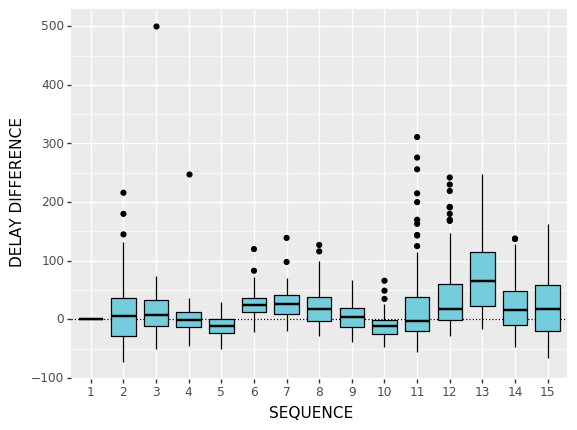

<ggplot: (-9223371922291778584)>

In [32]:
peak_time['SEQUENCE_cat'] = peak_time['SEQUENCE'].astype('category')

plot_box1 = ggplot(peak_time, aes(x='SEQUENCE_cat', y='DIFF_DELAY')) + \
            geom_hline(yintercept=0,linetype='dotted') + \
            geom_boxplot(color='black', fill='#74CDDC') + \
            xlab("SEQUENCE") + \
            ylab("DELAY DIFFERENCE")
plot_box1

In [33]:
soubor['STOP_NAME'].unique()

array(['Dolní Břežany,Náměstí', 'Dolní Břežany,Na kopečku', 'Písnice',
       'Ke Březině', 'Lipovická', 'Sídliště Písnice',
       'U Libušské sokolovny', 'Libuš', 'U Zvoničky', 'Jalodvorská',
       'Tempo', 'Sídliště Krč', 'Zálesí', 'Nemocnice Krč', 'Kačerov'],
      dtype=object)

### **Kruskal-Wallis H-test**

source: *https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/*

In [34]:
def specify_seq(data: pd.DataFrame, num_seq: int):
    new_df = data[data['SEQUENCE']==num_seq]['DIFF_DELAY']
    return new_df

In [35]:
print(f'For sequence 2: mean={round(mean(specify_seq(peak_time,2)),4)}, std={round(std(specify_seq(peak_time,2)),4)}')
print(f'For sequence 3: mean={round(mean(specify_seq(peak_time,3)),4)}, std={round(std(specify_seq(peak_time,3)),4)}')
print(f'For sequence 4: mean={round(mean(specify_seq(peak_time,4)),4)}, std={round(std(specify_seq(peak_time,4)),4)}')
print(f'For sequence 5: mean={round(mean(specify_seq(peak_time,5)),4)}, std={round(std(specify_seq(peak_time,5)),4)}')
print(f'For sequence 6: mean={round(mean(specify_seq(peak_time,6)),4)}, std={round(std(specify_seq(peak_time,6)),4)}')
print(f'For sequence 7: mean={round(mean(specify_seq(peak_time,7)),4)}, std={round(std(specify_seq(peak_time,7)),4)}')
print(f'For sequence 8: mean={round(mean(specify_seq(peak_time,8)),4)}, std={round(std(specify_seq(peak_time,8)),4)}')
print(f'For sequence 9: mean={round(mean(specify_seq(peak_time,9)),4)}, std={round(std(specify_seq(peak_time,9)),4)}')
print(f'For sequence 10: mean={round(mean(specify_seq(peak_time,10)),4)}, std={round(std(specify_seq(peak_time,10)),4)}')
print(f'For sequence 11: mean={round(mean(specify_seq(peak_time,11)),4)}, std={round(std(specify_seq(peak_time,11)),4)}')
print(f'For sequence 12: mean={round(mean(specify_seq(peak_time,12)),4)}, std={round(std(specify_seq(peak_time,12)),4)}')
print(f'For sequence 13: mean={round(mean(specify_seq(peak_time,13)),4)}, std={round(std(specify_seq(peak_time,13)),4)}')
print(f'For sequence 14: mean={round(mean(specify_seq(peak_time,14)),4)}, std={round(std(specify_seq(peak_time,14)),4)}')
print(f'For sequence 15: mean={round(mean(specify_seq(peak_time,15)),4)}, std={round(std(specify_seq(peak_time,15)),4)}')

For sequence 2: mean=14.1071, std=58.6947
For sequence 3: mean=14.902, std=55.8802
For sequence 4: mean=1.901, std=30.0753
For sequence 5: mean=-11.8068, std=16.7968
For sequence 6: mean=25.9815, std=20.8766
For sequence 7: mean=26.7391, std=23.4614
For sequence 8: mean=21.3739, std=30.8625
For sequence 9: mean=7.6695, std=25.6406
For sequence 10: mean=-10.7477, std=17.7228
For sequence 11: mean=22.0, std=68.8851
For sequence 12: mean=39.7257, std=58.1987
For sequence 13: mean=75.9831, std=61.2062
For sequence 14: mean=21.9052, std=42.3512
For sequence 15: mean=23.2342, std=50.9835


To determine whether more than two independent samples have a different distribution

In [36]:
stat, p = kruskal(specify_seq(peak_time,2),specify_seq(peak_time,3),specify_seq(peak_time,4),specify_seq(peak_time,5),
                  specify_seq(peak_time,6),specify_seq(peak_time,7),specify_seq(peak_time,8),specify_seq(peak_time,9),
                  specify_seq(peak_time,10),specify_seq(peak_time,11),specify_seq(peak_time,12),specify_seq(peak_time,13),
                  specify_seq(peak_time,14),specify_seq(peak_time,15))
print(f'Statistics={stat}, p={p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=349.1689106619303, p=1.1602857697252003e-66
Different distributions (reject H0)


### **Conclusion: at least 2 bus stops have different data distribution**

# **Charts visualize relationship between delay and day of week**

Dataframe in period after covid, whole week with weekend, 7:50 - 9:20 am

In [37]:
full_week = after_covid_full[ (after_covid_full['ORIGIN_TIMESTAMP']>=t1) & (after_covid_full['ORIGIN_TIMESTAMP']<=t2) ]

In [38]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
full_week['DAY_OF_WEEK'] = pd.Categorical(full_week['DAY_OF_WEEK'], days)
full_week.sort_values('DAY_OF_WEEK')

,TRIP_ID,ROUTE,DAY_OF_WEEK,DATE,UNICORN,START_TIME,HEADSIGN,STOP_ID,STOP_SEQUENCE,STOP_NAME,SHAPE_DIST_TRAVELED,DELAY,ORIGIN_TIMESTAMP,TIMETABLE_ARRIVAL_TIME,DIFF_DELAY,PREV_DELAY,SEQUENCE,HOUR,MINUTES,TIME
6878,331_260_200302,331,Monday,2020-06-01,331_260_200302_01_Jun,07:34:00,"Praha,Kačerov",U804Z2,16,U Zvoničky,10.22327,45.0,07:57:58,07:57:00,10.0,35.0,9,7.0,0.833333,7.833333
4927,333_715_200302,333,Monday,2020-05-25,333_715_200302_25_May,08:24:00,"Praha,Kačerov",U335Z2,9,Libuš,5.46109,329.0,08:41:37,08:36:00,116.0,213.0,8,8.0,0.666667,8.666667
4926,333_715_200302,333,Monday,2020-05-25,333_715_200302_25_May,08:24:00,"Praha,Kačerov",U783Z2,8,U Libušské sokolovny,5.09108,213.0,08:38:34,08:35:00,31.0,182.0,7,8.0,0.500000,8.500000
4925,333_715_200302,333,Monday,2020-05-25,333_715_200302_25_May,08:24:00,"Praha,Kačerov",U369Z2,7,Sídliště Písnice,4.61837,182.0,08:37:00,08:34:00,13.0,169.0,6,8.0,0.500000,8.500000
4924,333_715_200302,333,Monday,2020-05-25,333_715_200302_25_May,08:24:00,"Praha,Kačerov",U871Z2,6,Lipovická,4.11683,169.0,08:35:59,08:33:00,-22.0,191.0,5,8.0,0.500000,8.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,333_1012_200307,333,Sunday,2020-05-31,333_1012_200307_31_May,07:39:00,"Praha,Kačerov",U871Z2,18,Lipovická,13.34632,33.0,08:08:19,08:08:00,10.0,23.0,5,8.0,0.000000,8.000000
7580,333_1012_200307,333,Sunday,2020-05-31,333_1012_200307_31_May,07:39:00,"Praha,Kačerov",U369Z2,19,Sídliště Písnice,13.84786,29.0,08:09:23,08:09:00,-4.0,33.0,6,8.0,0.000000,8.000000
7581,333_1012_200307,333,Sunday,2020-05-31,333_1012_200307_31_May,07:39:00,"Praha,Kačerov",U783Z2,20,U Libušské sokolovny,14.32057,69.0,08:11:06,08:10:00,40.0,29.0,7,8.0,0.166667,8.166667
8131,333_1012_200307,333,Sunday,2020-05-24,333_1012_200307_24_May,07:39:00,"Praha,Kačerov",U1501Z2,15,"Dolní Břežany,Na kopečku",10.00941,25.0,08:02:23,08:02:00,42.0,-17.0,2,8.0,0.000000,8.000000


#### Boxplot visualize the delay for each day

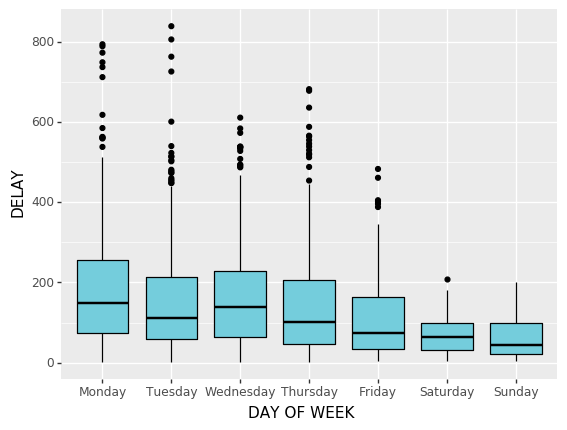

<ggplot: (-9223371922291828428)>

In [39]:
full_week['DAY_OF_WEEK_cat'] = full_week['DAY_OF_WEEK'].astype('category')

plot_box2 = ggplot(full_week, aes(x='DAY_OF_WEEK_cat', y='DELAY')) + \
            geom_boxplot(color='black', fill='#74CDDC') + \
            xlab("DAY OF WEEK") + \
            ylab("DELAY")
plot_box2

In [40]:
days_col = ['#74CDDC' , '#ffffb3','#BBC9DB','#fb8072','#386cb0','#28AE7B','#4DFFA5']

####  Groupby of delay and its behaviour during the days for bus stops

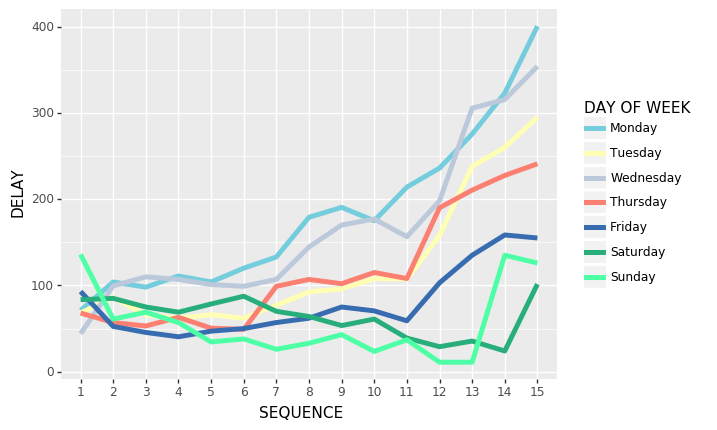

<ggplot: (-9223371922291535540)>


In [41]:
avg_delay_per_day_stop = full_week.groupby(['DAY_OF_WEEK','SEQUENCE'])[['DELAY']].median()
avg_delay_per_day_stop = avg_delay_per_day_stop.reset_index()
plot_week1 = ggplot(avg_delay_per_day_stop, aes(x='SEQUENCE', y='DELAY', color='DAY_OF_WEEK')) +\
            geom_line(size=2) + \
            xlab("SEQUENCE") + \
            ylab("DELAY") + \
            labs(color='DAY OF WEEK') + \
            scale_color_manual(values=days_col) + \
            scale_x_discrete(limits=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15))
print(plot_week1)

### **Mann-Whitney U-test**

source: *https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/*

Saturday & Sunday

In [42]:
# generate two independent samples
dataSat = full_week[full_week['DAY_OF_WEEK']=='Saturday']['DELAY']
dataSun = full_week[full_week['DAY_OF_WEEK']=='Sunday']['DELAY']
# compare samples
stat, p = mannwhitneyu(dataSun, dataSat)
print(f'Statistics={stat}, p={p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=3506.5, p=0.08678906557953414
Same distribution (fail to reject H0)


Friday & Saturday

In [43]:
# generate two independent samples
dataSat = full_week[full_week['DAY_OF_WEEK']=='Saturday']['DELAY']
dataFri = full_week[full_week['DAY_OF_WEEK']=='Friday']['DELAY']
# compare samples
stat, p = mannwhitneyu(dataFri, dataSat)
print(f'Statistics={stat}, p={p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=10473.5, p=0.0030396836240669622
Different distribution (reject H0)


Monday & Wednesday + rest of the days was tested in pair too

In [44]:
# generate two independent samples
dataMon = full_week[full_week['DAY_OF_WEEK']=='Monday']['DELAY']
dataWed = full_week[full_week['DAY_OF_WEEK']=='Friday']['DELAY']
# compare samples
stat, p = mannwhitneyu(dataMon, dataWed)
print(f'Statistics={stat}, p={p}')
# interpret
alpha = 0.05
if p > alpha:
    print('Same distribution (fail to reject H0)')
else:
    print('Different distribution (reject H0)')

Statistics=33252.0, p=4.7837022793104624e-14
Different distribution (reject H0)


### **Conclusion: we have different distribution groups -> group1 (Monday+Wednesday), group2 (Tuesday+Thursday), group3 (Friday), group4 (Saturday+Sunday)**

Vizualization for the conclusion - data distribution of delay for each day

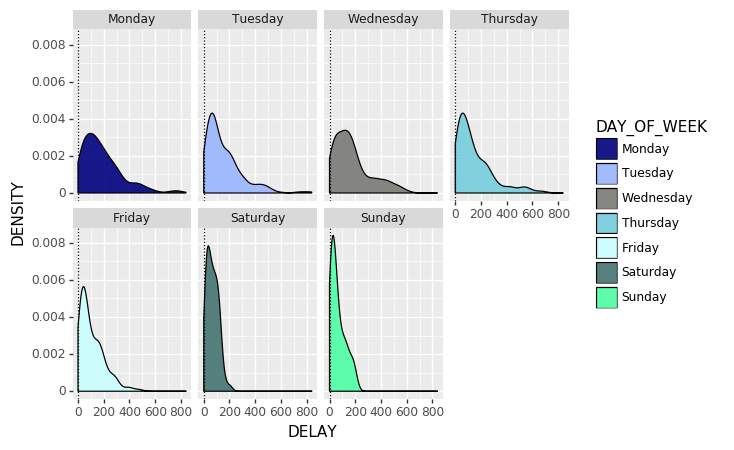

<ggplot: (-9223371922294025624)>

In [45]:
plot_hist3 = ggplot(full_week, aes(x='DELAY', fill='DAY_OF_WEEK')) + \
            geom_density(alpha=.9, color='black') + \
            facet_wrap(['DAY_OF_WEEK'], nrow=2) + \
            geom_vline(xintercept=0,linetype='dotted') + \
            scale_fill_manual(values=['#000080','#98B5FF','#797975','#74CDDC','#C9FFFF','#457371','#4DFFA5']) + \
            xlab("DELAY") + \
            ylab("DENSITY")
plot_hist3

# **How many buses are on time or delayed**

Dataset during working week in the specific time interval (7:50 - 9:20)

In [46]:
delay_2minutes = peak_time[ (peak_time['DELAY']>=120) & (peak_time['DELAY']<300) ]
delay_5minutes = peak_time[peak_time['DELAY']>=300]
delay_nope = peak_time[peak_time['DELAY']<120]

In [47]:
delay_2 = delay_2minutes.groupby('DAY_OF_WEEK')['DELAY'].count()
delay_5 = delay_5minutes.groupby('DAY_OF_WEEK')['DELAY'].count()
at_time = delay_nope.groupby('DAY_OF_WEEK')['DELAY'].count()

In [48]:
index = ['Monday', 'Tuesday', 'Wednesday',
         'Thursday', 'Friday']
df_barplot = pd.DataFrame({
    'AT TIME': at_time,
    '2-5 MIN': delay_2,
    'MORE THAN 5 MIN':delay_5
}, index=index) 

In [49]:
m = pd.melt(df_barplot.reset_index(), id_vars=['index'])

In [50]:
m

,index,variable,value
0,Monday,AT TIME,158
1,Tuesday,AT TIME,199
2,Wednesday,AT TIME,114
3,Thursday,AT TIME,163
4,Friday,AT TIME,169
5,Monday,2-5 MIN,158
6,Tuesday,2-5 MIN,128
7,Wednesday,2-5 MIN,113
8,Thursday,2-5 MIN,90
9,Friday,2-5 MIN,87


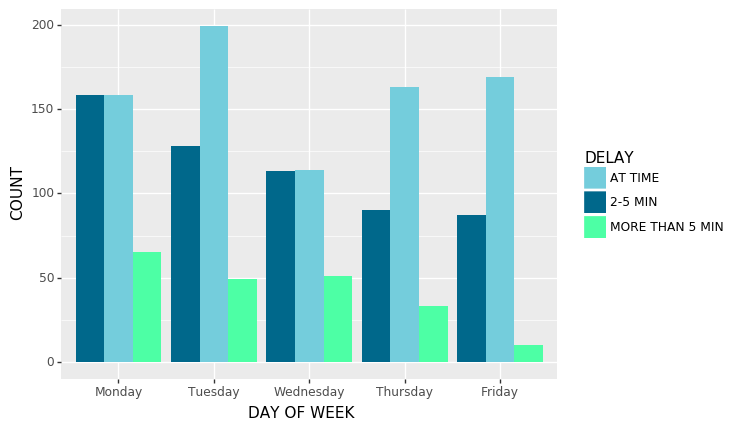

<ggplot: (-9223371922291319476)>

In [51]:
barplot = ggplot(m, aes(x = "index", y="value")) + \
                    xlab("DAY OF WEEK") + \
                    ylab("COUNT") + \
                    geom_bar(aes(fill = "variable"),stat = "identity", position = "dodge") + \
                    scale_fill_manual(values=['#00688B','#74CDDC', '#4DFFA5'],breaks=("AT TIME","2-5 MIN","MORE THAN 5 MIN")) + \
                    labs(fill = "DELAY") + \
                    scale_x_discrete(limits=index)
barplot